This is what I got playing this game: https://gamesfortraders.com/coin-challenge/
I used the Kelly criterion, which in this case involved betting 20% of my capital in every bet (probability of heads was 0.6).

![title](coinbet.png)


Now let's simulate this scenario a thousand times, and see the expected results

In [52]:
import random
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

In [53]:
#Simulation for a coin bet in which we get the same amount of money back if we get heads, and heads.
#Strategy: Kelly criterion
def coin_bet(p_h = 0.6, cash = 250, n = 20):
    cash_list = [cash]    
    for i in range(n):
        bet  = cash_list[-1] * (2*p_h - 1) #0.2 if p_h = 0.6
        if random.random() < p_h: cash_list.append(cash_list[-1] + bet)
        else:  cash_list.append(cash_list[-1] - bet)    
    return cash_list          

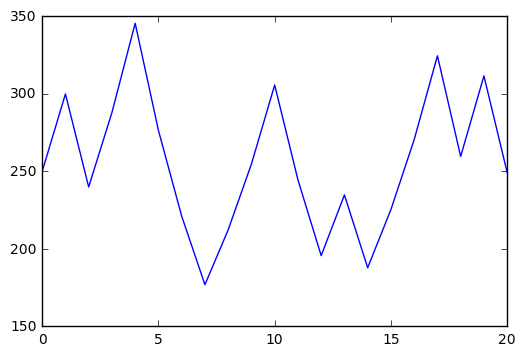

In [54]:
plt.plot(coin_bet())
plt.show()

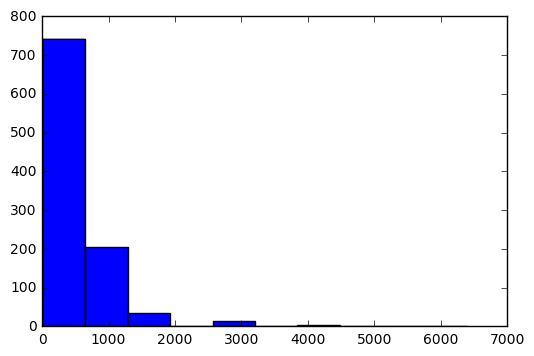

In [56]:
final_cash = []
for _ in range(1000):
    final_cash.append(coin_bet()[-1])
plt.hist(final_cash, bins = 10)
plt.show()

In [57]:
cash_series = pd.Series(final_cash)
print cash_series.describe()

count    1000.000000
mean      562.047340
std       610.742065
min        14.591663
25%       166.208159
50%       373.968358
75%       841.428805
max      6389.599987
dtype: float64


In [58]:
print "95% confidence intervals"
print "Lower bound: ", cash_series.quantile(.025)
print "Upper bound: ", cash_series.quantile(.975)

95% confidence intervals
Lower bound:  49.2468619253
Upper bound:  1893.21481109
